In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('fraud_data.csv')

def answer_one () :
    df = pd.read_csv('fraud_data.csv')
    ans = (len(df[df['Class'] == 1]) / len(df[df['Class'] == 0]))
    print(df.head())
    return ans

answer_one()

         V1        V2        V3        V4        V5        V6        V7  \
0  1.176563  0.323798  0.536927  1.047002 -0.368652 -0.728586  0.084678   
1  0.681109 -3.934776 -3.801827 -1.147468 -0.735540 -0.501097  1.038865   
2  1.140729  0.453484  0.247010  2.383132  0.343287  0.432804  0.093380   
3 -1.107073 -3.298902 -0.184092 -1.795744  2.137564 -1.684992 -2.015606   
4 -0.314818  0.866839 -0.124577 -0.627638  2.651762  3.428128  0.194637   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.069246 -0.266389  0.155315  ... -0.109627 -0.341365  0.057845  0.499180   
1 -0.626979 -2.274423  1.527782  ...  0.652202  0.272684 -0.982151  0.165900   
2  0.173310 -0.808999  0.775436  ... -0.003802  0.058556 -0.121177 -0.304215   
3 -0.007181 -0.165760  0.869659  ...  0.130648  0.329445  0.927656 -0.049560   
4  0.670674 -0.442658  0.133499  ... -0.312774 -0.799494 -0.064488  0.953062   

        V25       V26       V27       V28  Amount  Class  
0  0.4152

0.01557377049180328

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split
df1 = df.dropna()

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score,recall_score
    # Negative class (0) is most frequent
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Therefore the dummy 'most_frequent' classifier always predicts class 0
    y_dummy_predictions = dummy_majority.predict(X_test)

    dummy_majority.score(X_test, y_test)
    
    # Your code here
    
    return (accuracy_score(y_test, y_dummy_predictions),recall_score(y_test, y_dummy_predictions))
answer_two()    

(0.9854721549636803, 0.0)

In [5]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    df1 = df.dropna()
    X = df1.iloc[:,:-1]
    y = df1.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    svm = SVC().fit(X_train, y_train)
    svm_predicted = svm.predict(X_test)
    
    
    return (accuracy_score(y_test, svm_predicted),recall_score(y_test, svm_predicted),precision_score(y_test, svm_predicted))
answer_three()

(0.9891041162227603, 0.3055555555555556, 0.8461538461538461)

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    df1 = df.dropna()
    X = df1.iloc[:,:-1]
    y = df1.iloc[:,-1]
    svm = SVC(C = 1e9, gamma=1e-07).fit(X_train, y_train)
    svm_predicted = svm.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, svm_predicted)
    ans = confusion
    
    return ans

answer_four()

array([[2279,  163],
       [   1,   35]])

In [7]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    precision, recall, thresholds = precision_recall_curve(y_test, y_score_lr)
    closest_zero_p = np.argmin(np.abs(precision-0.75))
#     closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero_p]
    
#     print(closest_zero_r)
      
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
#     roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    closest_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
#     closest_zero_p = precision[closest_zero]
    closest_zero_tpr_lr = recall[closest_zero_fpr_lr]

    ans = (closest_zero_r, closest_zero_tpr_lr)
    return ans
answer_five()

/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

(0.8333333333333334, 0.9722222222222222)

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    lr = LogisticRegression()

    grid_values = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

    # default metric to optimize over grid parameters
    grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_lr.fit(X_train, y_train)
    
#     print(grid_lr.cv_results_['mean_test_score'].reshape(5,2))
    ans = np.array(grid_lr.cv_results_['mean_test_score'].reshape(5,2))
 
    return ans

answer_six()

/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

array([[       nan, 0.81050725],
       [       nan, 0.84456522],
       [       nan, 0.85289855],
       [       nan, 0.85289855],
       [       nan, 0.85289855]])

/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

<IPython.core.display.Javascript object>


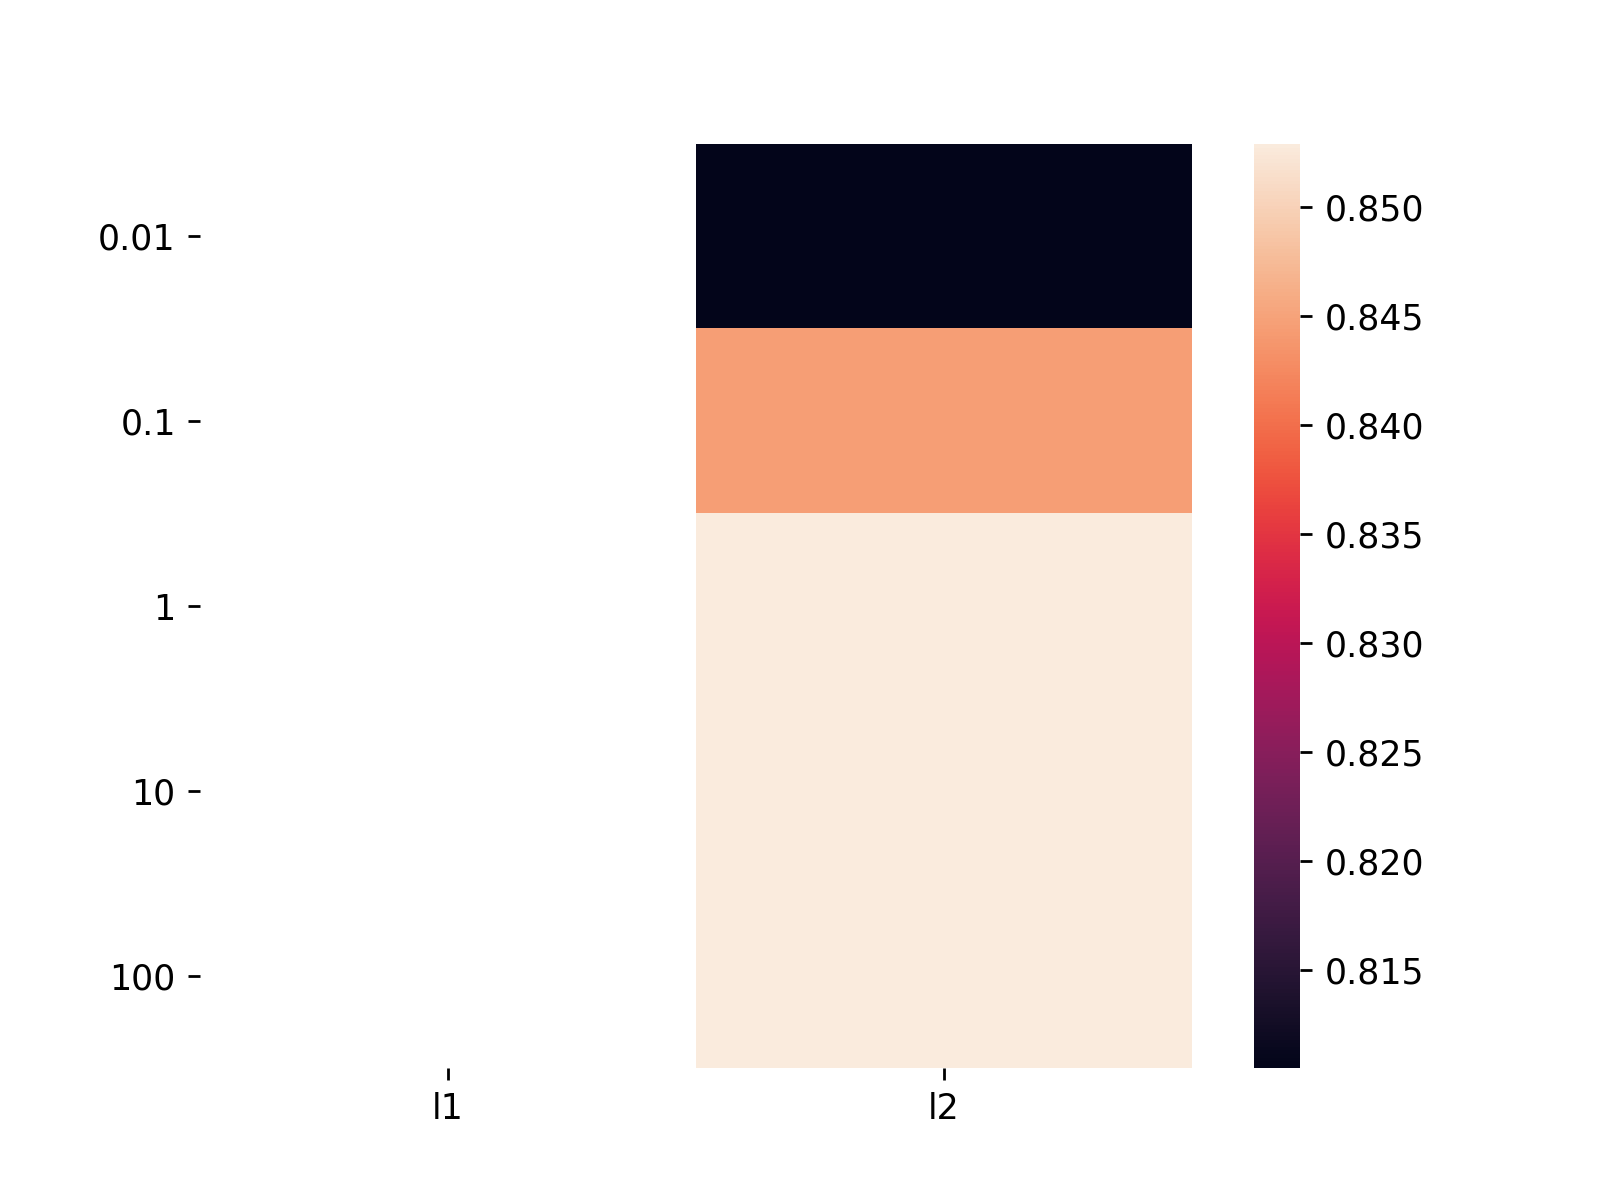

In [9]:
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())